In [8]:
import numpy as np
import queue
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [9]:
#Receives a list that represents the state: [n1,n2,...] where n1 != n2!= ...
def goaltest(state,goal):
    n = len(state)
    attacks = 0
    table = PrettyTable(['Attacks', 'i-j','X[i]-X[j]'])
    
    for i in range(0,n):
        X = state[i]
        for j in range(i+1,n):
            Y = state[j]
            table.add_row([str(attacks), str(i-j),str(X-Y)])
            #print("Attacks: "+str(attacks)+" i - j = "+str(i-j)+" X - Y = "+str(X-Y))
            if(X-Y == 0):
                attacks+=2
            if(abs(i-j) == abs(X-Y)):
                attacks+=2
    print(table)
        
    print("You got "+str(attacks)+" out of "+str(goal)+".\nYou "+("didn't ","")[attacks==goal]+"satisfy the goal.")
    return attacks == goal

In [10]:
#Expands the actual node, returns a list of states
def expand(state):
    expanded = []
    n = len(state)
    for i in range(0,n):
        temporal = [0]*n
        temporal[i] = 1
        expanded_value = list(np.add(temporal,state))
        #Validate that it can't overextend the range
        #And that it has unique values
        #if any(k > n for k in expanded_value) and not (len(set(expanded_value)) == n):
        #    continue
        expanded.append(expanded_value)
    return expanded


In [11]:
def addtoQueue(queue_,list_of_lists):
    for l in list_of_lists:
        queue_.put(l)

def printQueue(queue_,elem_limit):
    queue_= list(queue_.queue)
    if len(queue_)<elem_limit:
        print("frontier = "+str(queue_))
def printBoard(arr_solution):
    if arr_solution != []:
        size = len(arr_solution)

        chessboard = np.zeros((size,size))
        chessboard[1::2,0::2] = 1
        chessboard[0::2,1::2] = 1

        plt.imshow(chessboard, cmap='binary')
        print(arr_solution)
        for i in range(0,len(arr_solution)):
            j = arr_solution[i]-1
            plt.text(j, i, '♕', fontsize=20, ha='center', va='center', color='black' if (i - j) % 2 == 0 else 'white')
        plt.show()


In [12]:
# MAIN ALGORITHM
cost=1
arr_solution = []
def BFS(frontier,goal):
    global cost, arr_solution
    act_element = frontier.get()
    print("\n"+str(cost)+". ======== "+str(act_element)+" ========")
    printBoard(arr_solution)
    if goaltest(act_element,goal):
        print("The BFS is "+str(act_element))
        arr_solution = act_element
        return
    
    offspring = expand(act_element)
    #print("offspring = "+str(offspring))
    
    addtoQueue(frontier,offspring)
    
    #printQueue(frontier,30)
    #print("frontier = "+str(frontier))
    cost+=1
    BFS(frontier,goal)

In [13]:
front = queue.Queue()
front.put([1,1,1,1])
BFS(front,0)
print(str(cost)+" iterations were done.")
cost = 0
front.queue.clear()


1. ======== [1, 1, 1, 1] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     0     |
|    2    |  -2 |     0     |
|    4    |  -3 |     0     |
|    6    |  -1 |     0     |
|    8    |  -2 |     0     |
|    10   |  -1 |     0     |
+---------+-----+-----------+
You got 12 out of 0.
You didn't satisfy the goal.

2. ======== [2, 1, 1, 1] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     1     |
|    2    |  -2 |     1     |
|    2    |  -3 |     1     |
|    2    |  -1 |     0     |
|    4    |  -2 |     0     |
|    6    |  -1 |     0     |
+---------+-----+-----------+
You got 8 out of 0.
You didn't satisfy the goal.

3. ======== [1, 2, 1, 1] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     -1    |
|    2    |  -2 |     0     |
|    4    |  -3 |     0     |
|    6    |  -1 

274. ======== [2, 1, 2, 3] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     1     |
|    2    |  -2 |     0     |
|    4    |  -3 |     -1    |
|    4    |  -1 |     -1    |
|    6    |  -2 |     -2    |
|    8    |  -1 |     -1    |
+---------+-----+-----------+
You got 10 out of 0.
You didn't satisfy the goal.

275. ======== [1, 2, 2, 3] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     -1    |
|    2    |  -2 |     -1    |
|    2    |  -3 |     -2    |
|    2    |  -1 |     0     |
|    4    |  -2 |     -1    |
|    4    |  -1 |     -1    |
+---------+-----+-----------+
You got 6 out of 0.
You didn't satisfy the goal.

276. ======== [1, 1, 3, 3] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     0     |
|    2    |  -2 |     -2    |
|    4    |  -3 |     -2    |
|    4    |

+---------+-----+-----------+
You got 4 out of 0.
You didn't satisfy the goal.

479. ======== [3, 2, 3, 1] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     1     |
|    2    |  -2 |     0     |
|    4    |  -3 |     2     |
|    4    |  -1 |     -1    |
|    6    |  -2 |     1     |
|    6    |  -1 |     2     |
+---------+-----+-----------+
You got 6 out of 0.
You didn't satisfy the goal.

480. ======== [3, 1, 4, 1] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     2     |
|    0    |  -2 |     -1    |
|    0    |  -3 |     2     |
|    0    |  -1 |     -3    |
|    0    |  -2 |     0     |
|    2    |  -1 |     3     |
+---------+-----+-----------+
You got 2 out of 0.
You didn't satisfy the goal.

481. ======== [3, 1, 3, 2] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     

You got 8 out of 0.
You didn't satisfy the goal.

643. ======== [2, 3, 2, 2] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     -1    |
|    2    |  -2 |     0     |
|    4    |  -3 |     0     |
|    6    |  -1 |     1     |
|    8    |  -2 |     1     |
|    8    |  -1 |     0     |
+---------+-----+-----------+
You got 10 out of 0.
You didn't satisfy the goal.

644. ======== [2, 2, 3, 2] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     0     |
|    2    |  -2 |     -1    |
|    2    |  -3 |     0     |
|    4    |  -1 |     -1    |
|    6    |  -2 |     0     |
|    8    |  -1 |     1     |
+---------+-----+-----------+
You got 10 out of 0.
You didn't satisfy the goal.

645. ======== [2, 2, 2, 3] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     0     |
|    2    |  -2 |   

+---------+-----+-----------+
You got 8 out of 0.
You didn't satisfy the goal.

838. ======== [3, 2, 1, 3] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     1     |
|    2    |  -2 |     2     |
|    4    |  -3 |     0     |
|    6    |  -1 |     1     |
|    8    |  -2 |     -1    |
|    8    |  -1 |     -2    |
+---------+-----+-----------+
You got 8 out of 0.
You didn't satisfy the goal.

839. ======== [2, 3, 1, 3] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     -1    |
|    2    |  -2 |     1     |
|    2    |  -3 |     -1    |
|    2    |  -1 |     2     |
|    2    |  -2 |     0     |
|    4    |  -1 |     -2    |
+---------+-----+-----------+
You got 4 out of 0.
You didn't satisfy the goal.

840. ======== [2, 2, 2, 3] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     

+---------+-----+-----------+
You got 6 out of 0.
You didn't satisfy the goal.

1004. ======== [1, 3, 4, 1] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     -2    |
|    0    |  -2 |     -3    |
|    0    |  -3 |     0     |
|    2    |  -1 |     -1    |
|    4    |  -2 |     2     |
|    6    |  -1 |     3     |
+---------+-----+-----------+
You got 6 out of 0.
You didn't satisfy the goal.

1005. ======== [1, 3, 3, 2] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     -2    |
|    0    |  -2 |     -2    |
|    2    |  -3 |     -1    |
|    2    |  -1 |     0     |
|    4    |  -2 |     1     |
|    4    |  -1 |     1     |
+---------+-----+-----------+
You got 6 out of 0.
You didn't satisfy the goal.

1006. ======== [2, 2, 4, 1] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |  

+---------+-----+-----------+
You got 8 out of 0.
You didn't satisfy the goal.

1139. ======== [2, 3, 1, 3] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     -1    |
|    2    |  -2 |     1     |
|    2    |  -3 |     -1    |
|    2    |  -1 |     2     |
|    2    |  -2 |     0     |
|    4    |  -1 |     -2    |
+---------+-----+-----------+
You got 4 out of 0.
You didn't satisfy the goal.

1140. ======== [2, 2, 2, 3] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     0     |
|    2    |  -2 |     0     |
|    4    |  -3 |     -1    |
|    4    |  -1 |     0     |
|    6    |  -2 |     -1    |
|    6    |  -1 |     -1    |
+---------+-----+-----------+
You got 8 out of 0.
You didn't satisfy the goal.

1141. ======== [2, 2, 1, 4] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |  

+---------+-----+-----------+
You got 4 out of 0.
You didn't satisfy the goal.

1320. ======== [2, 2, 2, 3] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     0     |
|    2    |  -2 |     0     |
|    4    |  -3 |     -1    |
|    4    |  -1 |     0     |
|    6    |  -2 |     -1    |
|    6    |  -1 |     -1    |
+---------+-----+-----------+
You got 8 out of 0.
You didn't satisfy the goal.

1321. ======== [2, 2, 1, 4] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     0     |
|    2    |  -2 |     1     |
|    2    |  -3 |     -2    |
|    2    |  -1 |     1     |
|    4    |  -2 |     -2    |
|    6    |  -1 |     -3    |
+---------+-----+-----------+
You got 6 out of 0.
You didn't satisfy the goal.

1322. ======== [2, 3, 1, 3] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |  

+---------+-----+-----------+
You got 12 out of 0.
You didn't satisfy the goal.

1512. ======== [4, 2, 3, 1] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     2     |
|    0    |  -2 |     1     |
|    0    |  -3 |     3     |
|    2    |  -1 |     -1    |
|    4    |  -2 |     1     |
|    4    |  -1 |     2     |
+---------+-----+-----------+
You got 4 out of 0.
You didn't satisfy the goal.

1513. ======== [4, 2, 2, 2] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     2     |
|    0    |  -2 |     2     |
|    2    |  -3 |     2     |
|    2    |  -1 |     0     |
|    4    |  -2 |     0     |
|    6    |  -1 |     0     |
+---------+-----+-----------+
You got 8 out of 0.
You didn't satisfy the goal.

1514. ======== [4, 3, 2, 1] ========
+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 | 

[3, 1, 4, 2]


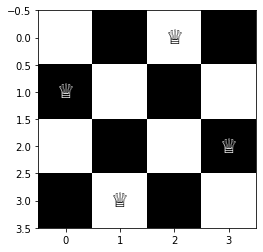

END


In [14]:
printBoard(arr_solution)
arr_solution = []
print("END")

In [8]:
goaltest([3,1,4,2],0)

+---------+-----+-----------+
| Attacks | i-j | X[i]-X[j] |
+---------+-----+-----------+
|    0    |  -1 |     2     |
|    0    |  -2 |     -1    |
|    0    |  -3 |     1     |
|    0    |  -1 |     -3    |
|    0    |  -2 |     -1    |
|    0    |  -1 |     2     |
+---------+-----+-----------+
You got 0 out of 0.
You satisfy the goal.


True